## Graphical User Input

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
axes = plt.gca()
axes.set_xlim([1,5])
axes.set_ylim([1,5])
print("Please click")
x = plt.ginput(n=10, timeout=30, show_clicks=True, mouse_add=1, mouse_pop=3, mouse_stop=2)
points = []
for i in range(len(x)):
    points.append([x[i][0], x[i][1]])

Please click


## Відкриття файлу

In [ ]:
def open_file(path_file):
    f=open(path_file, "r")
    t = int(f.readline())
    points = []
    for i in range(t):
        l = f.readline()
        l = l.split()
        ls = []
        for elem in l:
            ls.append(float(elem))
        points.append(ls)
    return points

points = open_file("points.txt")

## Points random 2d

In [6]:
N = 1000
x = np.random.rand(N) * 10000
y = np.random.rand(N) * 10000
points = []
for i in range(len(x)):
    points.append([x[i], y[i]])

## Points random 3d

In [10]:
N = 100
x = np.random.rand(N) * 10000
y = np.random.rand(N) * 10000
z = np.random.rand(N) * 10000
points = []
for i in range(len(x)):
    points.append([x[i], y[i], z[i]])

## Show 3D

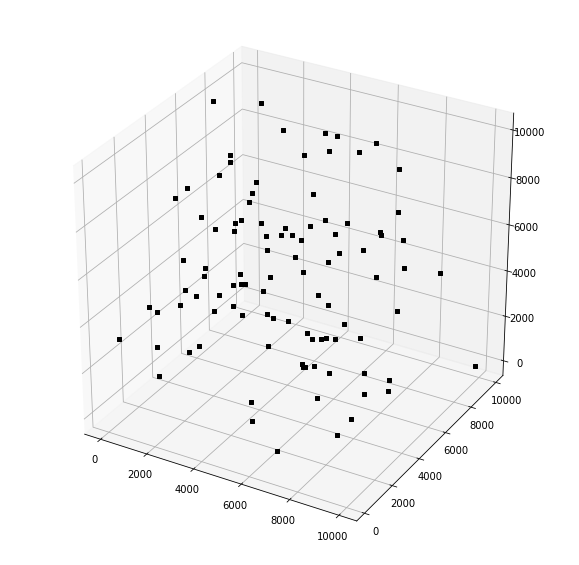

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d

fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d', aspect='equal')

for x, y, z in points:
    ax.scatter(x, y, z, color='black', marker='s')

## show 2D

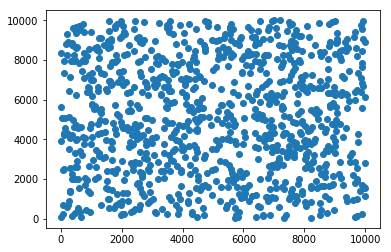

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []
for i in range(len(points)):
    x.append(points[i][0])
    y.append(points[i][1])

plt.scatter(x, y)
plt.show()
# print(points)

##  Побудова графа

In [12]:
import math

import numpy as np
from scipy.spatial import Delaunay

tri = Delaunay(points)

edges = set()

def generate_all_possible_edges(tri):
    for triangle in tri.simplices:
        for i in range(len(triangle)):
            for j in range(i + 1, len(triangle)):
                if i == j: 
                    continue
                l = (triangle[i], triangle[j])
                edges.add(l)
                
generate_all_possible_edges(tri)

def dist(point1, point2):
    res = 0
    for i in range(len(point1)):
        diff = abs(point1[i] - point2[i])
        res += diff * diff
    return math.sqrt(res)

def build_graph(points, edges):
    graph = []
    for edge in edges:
        weighted_edge = [edge[0], edge[1], dist(points[edge[0]], points[edge[1]])]
        graph.append(weighted_edge)
    return graph
graph = build_graph(tri.points, edges)
# print(graph)

##  Знаходження Евклідове Мінімальне Кістякове Дерево

In [4]:
def createAdjMatrix(V, G):
  adjMatrix = []
  for i in range(0, V):
    adjMatrix.append([])
    for j in range(0, V):
      adjMatrix[i].append(0)
  for i in range(0, len(G)):
    adjMatrix[G[i][0]][G[i][1]] = G[i][2]
    adjMatrix[G[i][1]][G[i][0]] = G[i][2]
  return adjMatrix

def prims(V, G):
  adjMatrix = createAdjMatrix(V, G)
  vertex = 0
  MST = []
  edges = []
  visited = []
  minEdge = [None,None,float('inf')]
  while len(MST) != V-1:
    visited.append(vertex)
    for r in range(0, V):
      if adjMatrix[vertex][r] != 0:
        edges.append([vertex,r,adjMatrix[vertex][r]])
    for e in range(0, len(edges)):
      if edges[e][2] < minEdge[2] and edges[e][1] not in visited:
        minEdge = edges[e]
    edges.remove(minEdge)
    MST.append(minEdge)
    vertex = minEdge[1]
    minEdge = [None,None,float('inf')]
    
  return MST
# print (prims(len(tri.points), graph))

## Show 3D

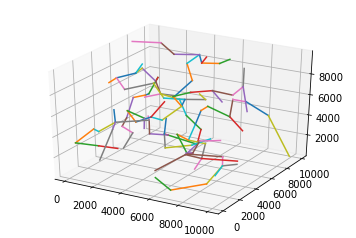

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

connected_edges = prims(len(tri.points), graph) 

for edge in connected_edges:
    index_start_point = edge[0]
    index_end_point = edge[1]
    xs = [tri.points[index_start_point][0], tri.points[index_end_point][0]]
    ys = [tri.points[index_start_point][1], tri.points[index_end_point][1]]
    zs = [tri.points[index_start_point][2], tri.points[index_end_point][2]]
    ax.plot(xs=xs, ys=ys, zs=zs)
    
plt.show()

## Show 2D

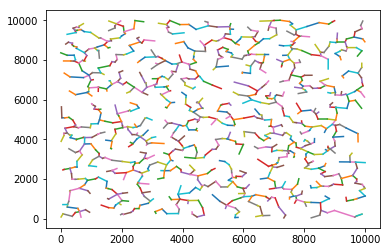

In [9]:
import numpy as np
x = []
y = []
connected_edges = prims(len(tri.points), graph) 
for edge in connected_edges:
    index_start_point = edge[0]
    index_end_point = edge[1]
    x = []
    y = []
    x.append(tri.points[index_start_point][0])
    x.append(tri.points[index_end_point][0])
    y.append(tri.points[index_start_point][1])
    y.append(tri.points[index_end_point][1])
    plt.plot(x, y)

    
plt.plot(x, y)
plt.show()